<a href="https://colab.research.google.com/github/hebermudezg/Coloquio_2019_NLP/blob/master/Coloquio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP
---

El procesamiento del lenguaje natural (PNL) es una rama del aprendizaje automático que se ocupa del procesamiento, el análisis y, a veces, la generación del habla humana ("lenguaje natural").

Se usa en:

* chatbots 
* Anásis de sentimientos
* Asistetes de voz

SpaCy.
---
spaCy es una biblioteca de procesamiento de lenguaje natural de código abierto para Python. Está diseñado especialmente para uso en producción, y puede ayudarnos a crear aplicaciones que procesen volúmenes masivos de texto de manera eficiente

# Extracción del texto

### De la URL

In [0]:
def extraer_link(URL):
  #Importar librerias
  import bs4 as bs # web scraping
  import urllib.request #extraer de la web
  # Extraemos texto de la url
  link = urllib.request.urlopen(URL)
  article = link.read() #para leer los datos
  parsed_article = bs.BeautifulSoup(article,'lxml')
  paragraphs = parsed_article.find_all('p')
  origin_text = ""
  for p in paragraphs:
      origin_text += p.text
  
  return(origin_text)

In [0]:
URL = "https://www.biografiasyvidas.com/biografia/d/dali.htm"
crudo= extraer_link(URL)

### De un txt

In [0]:
text_txt = open('frases.txt', 'r')

# Limpieza tokenizando
---

In [0]:
def Cleaner_text(text1):
  #minusculas
  text1 = text1.lower()
  #quitar numeros
  import re 
  text1 = re.sub (r'\d+','', text1) 
  text1= re.sub(r'\r\n', '', text1)
  text1=text1.replace('y', '')
  #quitar puntuacion
  text1 = re.sub(r'[^\w\s]','',text1)
  # SpaCy
  import spacy
  from spacy.lang.es import Spanish
  from spacy.tokenizer import Tokenizer
  nlp2 = Spanish()

# nlp es usado para crear docuementos con anotaciones linguisticas 
  doc = nlp2(text1)

# Creamos una lista de tokens
  token_list = []
  for token in doc:
      token_list.append(token.text)
# stop words
  from spacy.lang.es.stop_words import STOP_WORDS
  spacy_stopwords = spacy.lang.es.stop_words.STOP_WORDS
  spacy_stopwords.add('y') #agregar y
  spacy_stopwords.add('a') #agregar a
  spacy_stopwords.add('e')

  filtered_sent=[]
# filtrando stop words
  for word in doc:
      if word.is_stop==False:
          filtered_sent.append(word)
  return(filtered_sent)

In [0]:
text1 = """Un ejemplo de una Construcción \r\n en la calle 55-04 podemos ver techos tejados 123456 @$^&*() """
Cleaner_text(text1)

[construcción,  , calle,  , techos, tejados,   ]

# Limpieza sin Tokenizar

In [0]:
def Cleaner_text_sin_tok(text1):
  #minusculas
  text1 = text1.lower()
  #quitar numeros
  import re 
  text1 = re.sub (r'\d+','', text1) 
  text1= re.sub(r'\r\n', '', text1)
  text1=text1.replace('y', '')
  #quitar puntuacion
  text1 = re.sub(r'[^\w\s]','',text1)
  # SpaCy
  import spacy
  from spacy.lang.es import Spanish
  from spacy.tokenizer import Tokenizer
  nlp2 = Spanish()

# nlp es usado para crear docuementos con anotaciones linguisticas 
  doc = nlp2(text1)

# Creamos una lista de tokens
  token_list = []
  for token in doc:
      token_list.append(token.text)
# stop words
  from spacy.lang.es.stop_words import STOP_WORDS
  spacy_stopwords = spacy.lang.es.stop_words.STOP_WORDS
  spacy_stopwords.add('y') #agregar y
  spacy_stopwords.add('a') #agregar a
  spacy_stopwords.add('e')

  filtered_sent=[]
# filtrando stop words
  for word in doc:
      if word.is_stop==False:
          filtered_sent.append(word)
          
  sentence = filtered_sent
  sent_str = ""
  
#Reunir nuevamente el texto
  for i in sentence:
      sent_str += str(i) + "  "
      sent_str = sent_str[:-1]

#Quitar espacios en blanco repetidos    
  text1 = " ".join(sent_str.split())

  return(text1)

In [0]:
text = Cleaner_text_sin_tok(crudo)
text

'figueres gerona pintor español inmenso prestigio popularidad gozó vida debió estrafalarias impostadas excentricidades salvador dalí acertó insuflar vida surrealismo europeo convertirse conocido representante confusas ideas estéticas llamado método paranoicocrítico decisivas impactantes composiciones trasladó magistral precisión técnica personalísimo universo onírico simbólico nítido luminoso profundamente inquietante perturbador salvador dalísalvador dalí nació madrugada primavera seno familia burguesa hijo notario bienpensante sensible dama aficionada pájaros años escribiría autobiografía vida secreta salvador dalí años quería cocinero quería napoleón ambición crecer llegar salvador dalí mu difícil medida acerco salvador dalí aleja puesto persecución incesante objetivo habría alcanzarse recodo biografía previsto hallara equilibrio paz dalí decidió excesivo interpretar numerosos personajes sublimar angustia pluralidad delirios humorísticos sórdidos definió perverso polimorfo rezagado 

# Lematización
---

In [0]:
# Ejemplo
lem = nlp2("jugar jugaron juego juguetes")
# finding lemma for each word
for word in lem:
    print(word.text,word.lemma_)

jugar jugar
jugaron jugar
juego jugar
juguetes juguete


# Código para gráficos
---

### Nube en una función

In [0]:
# n es el maximo de palabras de la nube
def nube(text, n):
  import numpy as np
  import pandas as pd
  from os import path
  from PIL import Image
  from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
  import matplotlib.pyplot as plt
  % matplotlib inline
  wordcloud = WordCloud(max_font_size=90, max_words=n, background_color="azure").generate(text)
  plt.figure()
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.show()

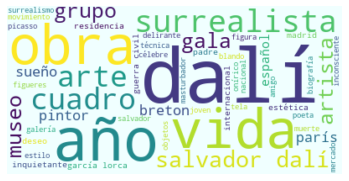

In [0]:
# Llamado de la funcón nube
nube(text,50)

### Bigrama en una función

In [0]:
# n= los n pares de palabras mas comunes
def frec_bigrama (text,n):
  #librerias
  import os
  import numpy as np
  import pandas as pd
  import matplotlib.pyplot as plt
  import seaborn as sns
  import itertools
  import collections
  import nltk
  from nltk import bigrams
  from nltk.corpus import stopwords
  import re
  import warnings
  warnings.filterwarnings("ignore")
  text= [text] #meterlo como lista
  #Conteo pares de palabras
  bigrams = [b for l in text for b in zip(l.split(" ")[:-1], l.split(" ")[1:])]
  bigram_counts = collections.Counter(bigrams)
  bigram_df = pd.DataFrame(bigram_counts.most_common(n),
                             columns=['bigram', 'count'])
  #Ordenar de mayor a menor
  bigram_df = bigram_df.sort_values('count')
  
  #Grafico
  y_pos = np.arange(len(bigram_df['bigram']))
 
  # Create horizontal bars
  plt.barh(y_pos, bigram_df['count'], color='purple')
 
  # Create names on the y-axis
  plt.yticks(y_pos, bigram_df['bigram'])
  
  # Poner titulo
  plt.title('Bigrama')
 
  # Show graphic
  plt.show()

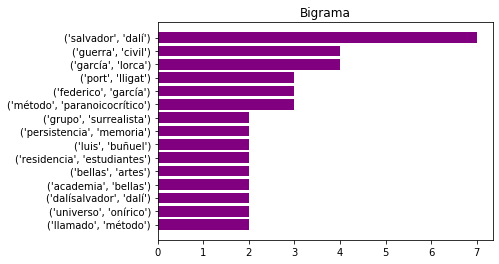

In [0]:
#Llamado de la funcion
frec_bigrama(text,15)

## Plot de redes en una función

In [0]:
def plot_red (text, n):
  import os
  import numpy as np
  import pandas as pd
  import matplotlib.pyplot as plt
  import seaborn as sns
  import itertools
  import collections

  import tweepy as tw
  import nltk
  from nltk import bigrams
  from nltk.corpus import stopwords
  import re
  import networkx as nx

  import warnings
  warnings.filterwarnings("ignore")

  sns.set(font_scale=1.5)
  sns.set_style("whitegrid")
  text= [text] #meterlo como lista
  #Conteo pares de palabras
  bigrams = [b for l in text for b in zip(l.split(" ")[:-1], l.split(" ")[1:])]
  bigram_counts = collections.Counter(bigrams)
  bigram_df = pd.DataFrame(bigram_counts.most_common(n),
                             columns=['bigram', 'count'])
  # Diccionario de bigramas y su conteo
  d = bigram_df.set_index('bigram').T.to_dict('records')

  # Crear plot de redes
  G = nx.Graph()

  # Conecciones entre nodos
  for k, v in d[0].items():
      G.add_edge(k[0], k[1], weight=(v * 10))

  fig, ax = plt.subplots(figsize=(10, 8))

  pos = nx.spring_layout(G, k=1)

  # Dibujar plot de redes
  nx.draw_networkx(G, pos,
                   font_size=16,
                   width=3,
                   edge_color='grey',
                   node_color='purple',
                   with_labels = False,
                   ax=ax)

  # Poner etiquetas
  for key, value in pos.items():
      x, y = value[0]+.135, value[1]+.045
      ax.text(x, y,
              s=key,
              bbox=dict(facecolor='red', alpha=0.25),
              horizontalalignment='center', fontsize=13)
  plt.title('Gráfico de redes'.format(y))

  return(plt.show())#mostrar plot
  

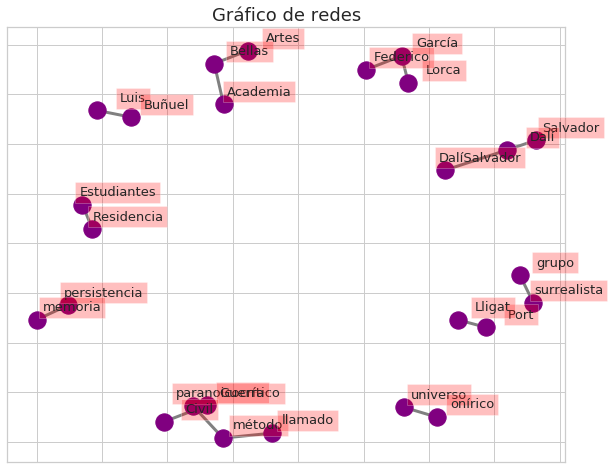

In [0]:
#Llamado de la función
plot_red (text, 15)

# Resumen extractivo en una función
---

In [0]:
def extractive_summarizer(URL,N):
  #Imprtar librerias
  import bs4 as bs # web scraping
  import urllib.request #extraer de la web
  import re
  import nltk #natural lenguage toolkit

# Extraemos texto de la url
  link = urllib.request.urlopen(URL)
  article = link.read() #para leer los datos
  parsed_article = bs.BeautifulSoup(article,'lxml')
  paragraphs = parsed_article.find_all('p')
  origin_text = ""

  for p in paragraphs:
      origin_text += p.text

# Remover caracteres y numeros
  origin_text = re.sub(r'\[[0-9]*\]', ' ', origin_text) #texto original
  origin_text = re.sub(r'\s+', ' ', origin_text)

  formatted_origin_text = re.sub('[^a-zA-Z]', ' ', origin_text ) #texto formateado
  formatted_origin_text = re.sub(r'\s+', ' ', formatted_origin_text)

# Lista de frases
  nltk.download('punkt')
  lista_oraciones = nltk.sent_tokenize(origin_text)

#Definir las palabras de parada
  nltk.download('stopwords')
  stopwords = nltk.corpus.stopwords.words('spanish') 

#hacemos un diccionario de frecuencias
  word_frequencies = {}
  for word in nltk.word_tokenize(formatted_origin_text):
      if word not in stopwords:
          if word not in word_frequencies.keys():
              word_frequencies[word] = 1
          else:
              word_frequencies[word] += 1
#Ponderamos
  maximum_frequncy = max(word_frequencies.values())

  for word in word_frequencies.keys():
     word_frequencies[word] = (word_frequencies[word]/maximum_frequncy)

# Calcula las puntuaciones de las oraciones:
  sentence_scores = {}
  for sent in lista_oraciones:
      for word in nltk.word_tokenize(sent.lower()):
          if word in word_frequencies.keys():
              if len(sent.split(' ')) < 30:
                  if sent not in sentence_scores.keys():
                      sentence_scores[sent] = word_frequencies[word]
                  else:
                      sentence_scores[sent] += word_frequencies[word]
#  N oraciones con las puntuaciones más altas
  import heapq
  summary_sentences = heapq.nlargest(N, sentence_scores, key=sentence_scores.get)

  summary = ' '.join(summary_sentences)

  return(summary)

In [0]:
#Llamado de la funcion
URL = "https://www.biografiasyvidas.com/biografia/d/dali.htm"
extractive_summarizer(URL,15)

In [0]:
text2 = extractive_summarizer(URL,15)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Código para el resumen abstractivo

## Con idioma inglés

In [0]:
from attention import AttentionLayer

In [0]:
import numpy as np  
import pandas as pd 
import re           
from bs4 import BeautifulSoup 
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
import nltk #toco instalarla
nltk.download('stopwords')
from nltk.corpus import stopwords  
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

Using TensorFlow backend.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Con los sigientes datos trabajaremos para entrenar modelo. Contiene dos columnas: una con un texto y otra con el resumen de dicho texto.

In [0]:
data = pd.read_csv("data_food.csv", nrows = 2000)
data.drop_duplicates(subset=['Text'],inplace=True)  #Quitar duplicados
data.dropna(axis=0,inplace=True)   #Quitar NA's
data.head()

,Unnamed: 0,Summary,Text
0,1,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labr...
1,2,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,3,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with ..."
3,4,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The fl...
4,5,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."


In [0]:
#Diccionario de contracciones en inglés
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                       

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}

Realizaremos las siguientes tareas de preprocesamiento para nuestros datos:


* Convierte todo a minúsculas
*Eliminar etiquetas HTML
*Mapeo de contracción
*Eliminar cualquier texto dentro del paréntesis ()
*Elimina los signos de puntuación y los caracteres especiales.
*Eliminar palabras vacías
*Eliminar palabras cortas

In [0]:
#Definir stop words
stop_words = set(stopwords.words('english')) 
#===================================================================
#Limpiar Columna Texto
def text_cleaner(text):
    newString = text.lower() #minusculas
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)#caracteres especiales
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    #filtrar stop words
    tokens = [w for w in newString.split() if not w in stop_words]
    long_words=[]
    for i in tokens:
        if len(i)>=3:                  
            long_words.append(i)   
    return (" ".join(long_words)).strip()

cleaned_text = []
for t in data['Text']:
    cleaned_text.append(text_cleaner(t))
    
#===================================================================
#Limpiar Columna Summary

def summary_cleaner(text):
    newString = re.sub('"','', text)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString)
    newString = newString.lower()
    tokens=newString.split()
    newString=''
    for i in tokens:
        if len(i)>1:                                 
            newString=newString+i+' '  
    return newString

#Call the above function
cleaned_summary = []
for t in data['Summary']:
    cleaned_summary.append(summary_cleaner(t))

data['cleaned_text']=cleaned_text
data['cleaned_summary']=cleaned_summary
data['cleaned_summary'].replace('', np.nan, inplace=True)
data.dropna(axis=0,inplace=True)

#Vizualizar la primera linea 
print("texto= ",cleaned_text[1],"; summary= ",cleaned_summary[1])

texto=  product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo ; summary=  not as advertised 


In [0]:
data.head()

,Unnamed: 0,Summary,Text,cleaned_text,cleaned_summary
0,1,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labr...,bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better,good quality dog food
1,2,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo"".",product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo,not as advertised
2,3,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with ...",confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat famil...,delight says it all
3,4,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The fl...,looking secret ingredient robitussin believe found got addition root beer extract ordered made cherry soda flavor medicinal,cough medicine
4,5,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal.",great taffy great price wide assortment yummy taffy delivery quick taffy lover deal,great taffy


Agregar los tokens especiales START y END al principio y al final del resumen:

In [0]:
data['cleaned_summary'] = data['cleaned_summary'].apply(lambda x : '_START_ '+ x + ' _END_')

Aquí, analizaremos la duración de las revisiones y el resumen para tener una idea general sobre la distribución de la longitud del texto. Esto nos ayudará a arreglar la longitud máxima de la secuencia:

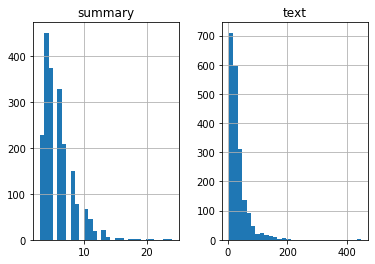

In [0]:
import matplotlib.pyplot as plt
text_word_count = []
summary_word_count = []

# llenar las listas con oraciones
for i in data['cleaned_text']:
      text_word_count.append(len(i.split()))

for i in data['cleaned_summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})
length_df.hist(bins = 30)
plt.show()

In [0]:
#Segun el grafico anterior Podemos fijar la duración máxima de las revisiones a 80,
#ya que parece ser la duración de la mayoría de las revisiones. Del mismo modo, podemos 
#establecer la longitud máxima del resumen en 10:

max_len_text=80 
max_len_summary=10

Ahora debemos dividir nuestro conjunto de datos en un conjunto de entrenamiento y validación. Usaremos el 90% del conjunto de datos como datos de entrenamiento y evaluaremos el rendimiento en el 10% restante

In [0]:
# x_tr, x_val son las particiones de training y validation para la columna Texto
# y_tr, y_val son las particiones de training y validation para la columna Summary
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(data['cleaned_text'],data['cleaned_summary'],test_size=0.1,random_state=0,shuffle=True)

In [0]:
#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr,  maxlen=max_len_text, padding='post') 
x_val   =   pad_sequences(x_val, maxlen=max_len_text, padding='post')

x_voc_size   =  len(x_tokenizer.word_index) +1

#===================================================================

#preparing a tokenizer for summary on training data 
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_tr))

#convert summary sequences into integer sequences
y_tr    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr, maxlen=max_len_summary, padding='post')
y_val   =   pad_sequences(y_val, maxlen=max_len_summary, padding='post')

y_voc_size  =   len(y_tokenizer.word_index) +1

**Construcción del modelo**

In [0]:
from keras import backend as K 
K.clear_session() 
latent_dim = 500 

# Encoder 
encoder_inputs = Input(shape=(max_len_text,)) 
enc_emb = Embedding(x_voc_size, latent_dim,trainable=True)(encoder_inputs) 

#LSTM 1 
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb) 

#LSTM 2 
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1) 

#LSTM 3 
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True) 
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2) 

# Set up the decoder. 
decoder_inputs = Input(shape=(None,)) 
dec_emb_layer = Embedding(y_voc_size, latent_dim,trainable=True) 
dec_emb = dec_emb_layer(decoder_inputs) 

#LSTM using encoder_states as initial state
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True) 
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c]) 

#Attention Layer
attn_layer = AttentionLayer(name='attention_layer') 
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs]) 

# Concat attention output and decoder LSTM output 
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#Dense layer
decoder_dense = TimeDistributed(Dense(y_voc_size, activation='softmax')) 
decoder_outputs = decoder_dense(decoder_concat_input) 

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs) 
model.summary()




Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 80)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 80, 500)      3673000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 80, 500), (N 2002000     embedding[0][0]                  
__________________________________________________________________________________________

Se debe compilar el modelo antes del training/testing

In [0]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

Aquí, se monitorea la pérdida de validación (val_loss). Nuestro modelo dejará de entrenar una vez que aumente la pérdida de validación:


In [0]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

**Entrenamiento:**

En un tamaño de lote de 512 y lo validaremos en el conjunto de reserva (que es el 10% de nuestro conjunto de datos):

In [0]:
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=2,callbacks=[es],batch_size=512, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 1793 samples, validate on 200 samples
Epoch 1/5
1793/1793 [==============================] - 17s 10ms/sample - loss: 6.0893 - val_loss: 3.0843
Epoch 2/5
1793/1793 [==============================] - 9s 5ms/sample - loss: 3.4528 - val_loss: 2.9496
Epoch 3/5
1793/1793 [==============================] - 9s 5ms/sample - loss: 3.1949 - val_loss: 2.7605
Epoch 4/5
1793/1793 [==============================] - 9s 5ms/sample - loss: 3.0606 - val_loss: 2.6747
Epoch 5/5
1793/1793 [==============================] - 9s 5ms/sample - loss: 2.9829 - val_loss: 2.7316
Epoch 00005: early stopping


Trazaremos algunas gráficas de diagnóstico para comprender el comportamiento del modelo a lo largo del tiempo:

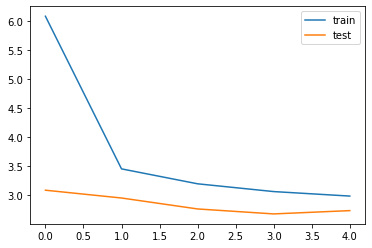

In [0]:
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend() 
pyplot.show()

 Creemos el diccionario para convertir el índice en palabra para el vocabulario de destino y fuente

In [0]:
reverse_target_word_index=y_tokenizer.index_word 
reverse_source_word_index=x_tokenizer.index_word 
target_word_index=y_tokenizer.word_index

Configure la inferencia para el codificador y el decodificador:

In [0]:
# encoder inference
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# decoder inference
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_len_text,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat)

# Final decoder model
decoder_model = Model(
[decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
[decoder_outputs2] + [state_h2, state_c2])

In [0]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))

    # Chose the 'start' word as the first word of the target sequence
    target_seq[0, 0] = target_word_index['start']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index+1]

        if(sampled_token!='end'):
            decoded_sentence += ' '+sampled_token

            # Exit condition: either hit max length or find stop word.
            if (sampled_token == 'end' or len(decoded_sentence.split()) >= (max_len_summary-1)):
                stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

Definamos las funciones para convertir una secuencia de enteros en una secuencia de palabras para el resumen, así como las revisiones:

In [0]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
      if((i!=0 and i!=target_word_index['start']) and i!=target_word_index['end']):
        newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
      if(i!=0):
        newString=newString+reverse_source_word_index[i]+' '
    return newString

In [0]:
for i in range(len(x_val)):
  print("Review:",seq2text(x_val[i]))
  print("Original summary:",seq2summary(y_val[i]))
  print("Predicted summary:",decode_sequence(x_val[i].reshape(1,max_len_text)))
  print("\n")

## Con idioma español

In [0]:
from attention import AttentionLayer

In [0]:
import numpy as np  
import pandas as pd 
import re           
from bs4 import BeautifulSoup 
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords   
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

In [0]:
data = pd.read_csv("data_food.csv", nrows = 2000)
data.drop_duplicates(subset=['Text'],inplace=True)  #Quitar duplicados
data.dropna(axis=0,inplace=True)   #Quitar NA's
data.head()

,Unnamed: 0,Summary,Text
0,1,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labr...
1,2,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,3,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with ..."
3,4,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The fl...
4,5,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."


In [0]:
#limpiar texto original
cleaned_text = []
for t in data['Text']:
    cleaned_text.append(Cleaner_text_sin_tok(t))
#limpiar resumen    
cleaned_summary = []
for t in data['Summary']:
    cleaned_summary.append(Cleaner_text_sin_tok(t))

In [0]:
data['cleaned_text']=cleaned_text # Agregar columna texto original limpio
data['cleaned_summary']=cleaned_summary # Agregar columna texto resumido limpio
data['cleaned_summary'].replace('', np.nan, inplace=True)
data.dropna(axis=0,inplace=True)

In [0]:
#Agregar inicio y fin en el resumen limpio
data['cleaned_summary'] = data['cleaned_summary'].apply(lambda x : '_START_ '+ x + ' _END_')

In [0]:
import matplotlib.pyplot as plt
text_word_count = []
summary_word_count = []

# llenar las listas con oraciones
for i in data['cleaned_text']:
      text_word_count.append(len(i.split()))

for i in data['cleaned_summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})
length_df.hist(bins = 30)
plt.show()

In [0]:
#Definir stop words
stop_words = set(stopwords.words('spanish')) 
#===================================================================
#Limpiar Columna Texto
def text_cleaner(text):
    newString = text.lower() #minusculas
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)#caracteres especiales
    newString = re.sub('"','', newString)
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    #filtrar stop words
    tokens = [w for w in newString.split() if not w in stop_words]
    long_words=[]
    for i in tokens:
        if len(i)>=3:                  
            long_words.append(i)   
    return (" ".join(long_words)).strip()

cleaned_text = []
for t in data['Text']:
    cleaned_text.append(text_cleaner(t))
    
cleaned_text

texto=  product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo ; summary=  not as advertised 


# Código de la App con kivy

La app se desarrolla inicialmente con la ayuda de la libreria kivy de python, esta nos ayuda a la creación de la app. En este fragmento de código vemos inicialmente como nos pide que ingrsemos los datos básicos de la información del texto que queremos resumir, como lo es la URL de donde se extrajo, el titulo del texto y que clase de texto es.

In [0]:
import kivy
from kivy.app import App
from kivy.uix.label import Label
from kivy.uix.gridlayout import GridLayout
from kivy.uix.textinput import TextInput
from kivy.uix.button import Button
from kivy.uix.screenmanager import ScreenManager, Screen
import os
kivy.require("1.11.1")


class ConnectPage(GridLayout):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.cols = 2

        if os.path.isfile("prev_details.txt"):
            with open("prev_details.txt", "r") as f:
                d = f.read().split(",")
                prev_url = d[0]
                prev_textittle = d[1]
                prev_textkind = d[2]

        else:
            prev_url = ""
            prev_textittle = ""
            prev_textkind = ""

        self.add_widget(Label(text="URL:"))

        self.url = TextInput(text=prev_url, multiline=False)
        self.add_widget(self.url)

        self.add_widget(Label(text="Text Tittle:"))

        self.textittle = TextInput(text=prev_textittle, multiline=False)
        self.add_widget(self.textittle)

        self.add_widget(Label(text="Text Kind:"))

        self.textkind = TextInput(text=prev_textkind, multiline=False)
        self.add_widget(self.textkind)

        self.join = Button(text="Join")
        self.join.bind(on_press=self.join_button)
        self.add_widget(Label())
        self.add_widget(self.join)

    def join_button(self, instance):
        url = self.url.text
        textittle = self.textittle.text
        textkind = self.textkind.text

        with open("prev_detail.txt", "w") as f:
            f.write(f"{textittle},{textkind},{url}")

        info = f"Resume of {textittle} : {textkind} from {url}"
        resume_app.info_page.update_info(info)


        resume_app.screen_manager.current = "Info"

class InfoPage(GridLayout):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.cols = 1
        self.message = Label(halign="center", valign="middle", font_size=30)
        self.message.bind(width=self.update_text_width)
        self.add_widget(self.message)

    def update_info(self, message):
        self.message.text = message

    def update_text_width(self, *_):
        self.message.text_size = (self.message.width*0.9, None)


class TextMinningApp(App):
    def build(self):
        self.screen_manager = ScreenManager()

        self.connect_page = ConnectPage()
        screen = Screen(name="Connect")
        screen.add_widget(self.connect_page)
        self.screen_manager.add_widget(screen)

        self.info_page = InfoPage()
        screen = Screen(name="Info")
        screen.add_widget(self.info_page)
        self.screen_manager.add_widget(screen)

        return self.screen_manager


if __name__ == "__main__":
    resume_app = TextMinningApp()
    resume_app.run()
